### Preprocessing

In [49]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [50]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [52]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Hitters.csv"
Hitters = pd.read_csv(url)
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


### 9.a. Removing NAs from Salary and log-transforming remaining salaries

Text(0.5,59.5,'features')

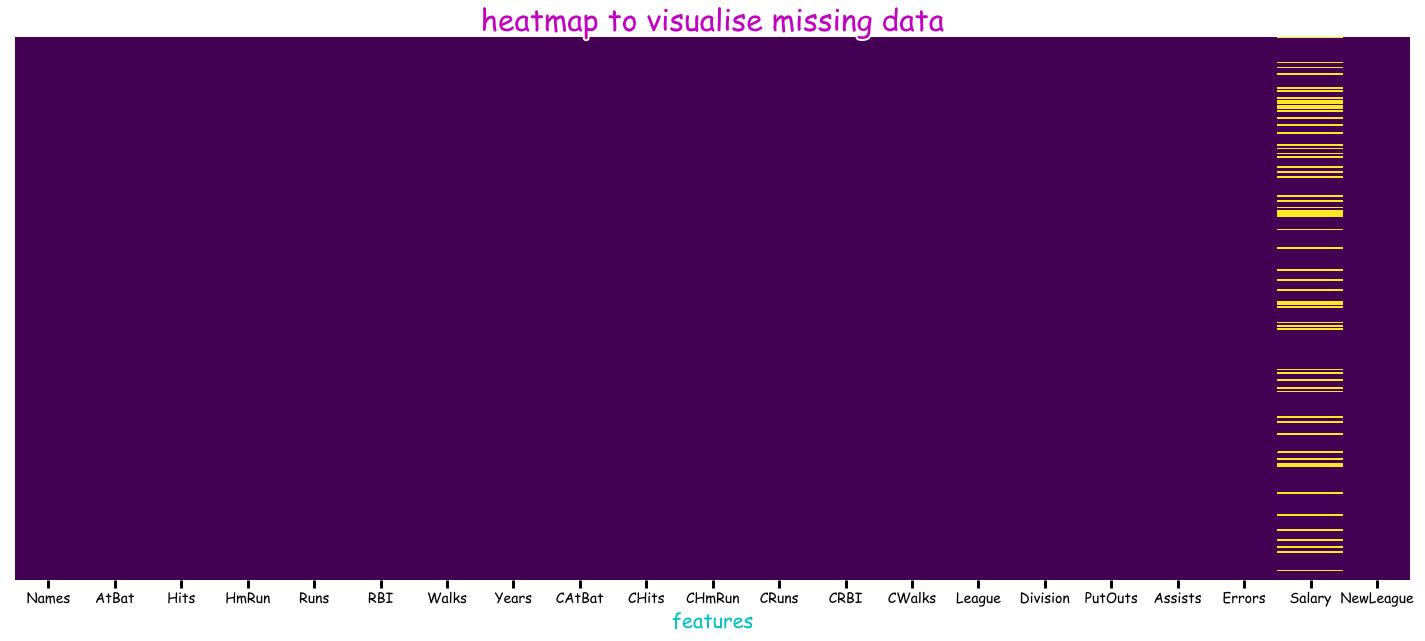

In [53]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(Hitters.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('heatmap to visualise missing data', fontsize=30, color='m')
plt.xlabel('features', fontsize=20, color='c')

In [54]:
Hitters.dropna(axis=0, inplace=True)

In [55]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


Text(0.5,59.5,'features')

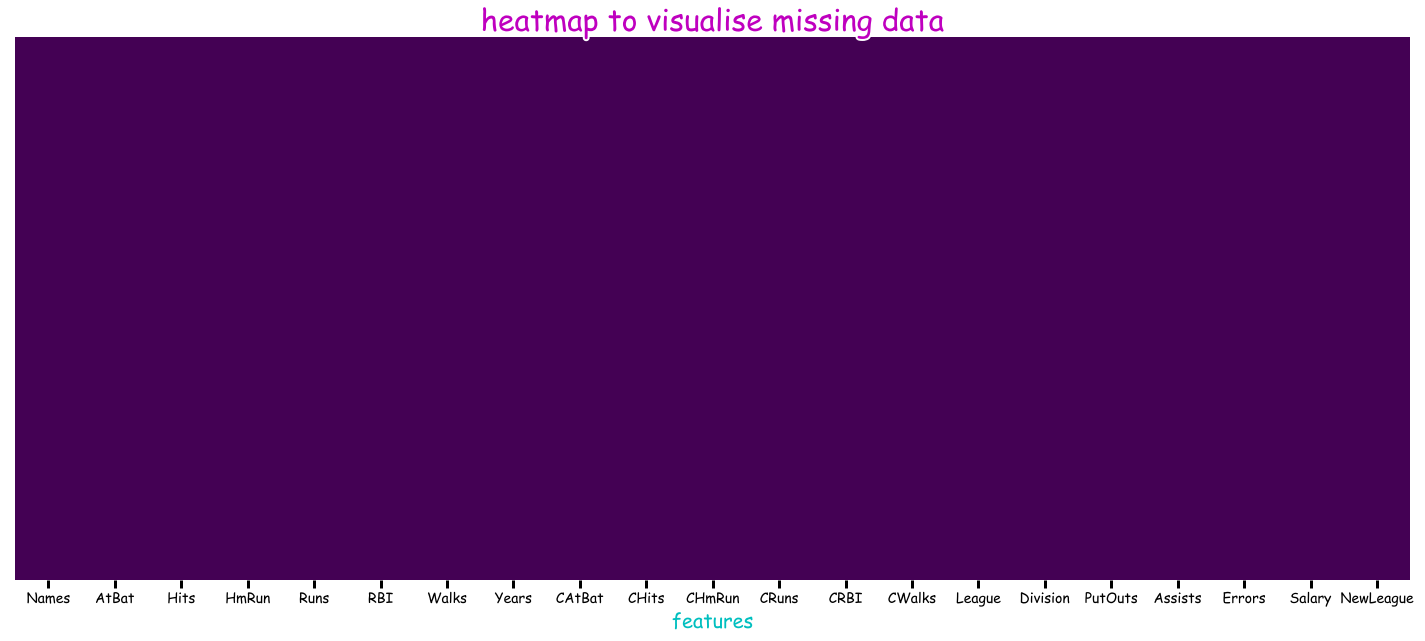

In [56]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(Hitters.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('heatmap to visualise missing data', fontsize=30, color='m')
plt.xlabel('features', fontsize=20, color='c')

**So, I have removed all observations where Salary information is unknown.**

In [57]:
Hitters.Salary = np.log(Hitters.Salary)

In [58]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,6.163315,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,6.173786,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,6.214608,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,4.516339,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,6.620073,A


**Therefore, I have log-transformed the salaries.**

In [61]:
Hitters.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [62]:
Hitters.Division.value_counts()

W    134
E    129
Name: Division, dtype: int64

In [63]:
Hitters.NewLeague.value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [64]:
Hitters.League = Hitters.League.map({'N': 0, 'A': 1})
Hitters.Division = Hitters.Division.map({'W': 0, 'E': 1})
Hitters.NewLeague = Hitters.NewLeague.map({'N': 0, 'A': 1})

In [65]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,0,0,632,43,10,6.163315,0
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,1,0,880,82,14,6.173786,1
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,0,1,200,11,3,6.214608,0
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,0,1,805,40,4,4.516339,0
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,1,0,282,421,25,6.620073,1


### 9.b. Splitting the data set into training data set and test data set

In [66]:
X = Hitters.drop(columns=['Salary', 'Names'])
y = Hitters.Salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23954372623, random_state=42)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 111 to 133
Data columns (total 19 columns):
AtBat        200 non-null int64
Hits         200 non-null int64
HmRun        200 non-null int64
Runs         200 non-null int64
RBI          200 non-null int64
Walks        200 non-null int64
Years        200 non-null int64
CAtBat       200 non-null int64
CHits        200 non-null int64
CHmRun       200 non-null int64
CRuns        200 non-null int64
CRBI         200 non-null int64
CWalks       200 non-null int64
League       200 non-null int64
Division     200 non-null int64
PutOuts      200 non-null int64
Assists      200 non-null int64
Errors       200 non-null int64
NewLeague    200 non-null int64
dtypes: int64(19)
memory usage: 31.2 KB


### 9.c. Boosting with 1,000 trees for a range of values of the shrinkage parameter, $\lambda$

In [90]:
SP = np.linspace(start=0.001, stop=0.9, num=100)
MSE = pd.DataFrame()

for k in SP:
    boost = GradientBoostingRegressor(n_estimators=1000, max_depth=4, learning_rate=k).fit(X_train, y_train)
    mse = mean_squared_error(y_test, boost.predict(X_test))
    MSE = MSE.append([mse])

MSE.columns = ['MSE']
MSE.reset_index(drop=True, inplace=True)

In [91]:
MSE.head()

,MSE
0,0.264427
1,0.257914
2,0.261203
3,0.267621
4,0.259103


### 9.d. Plotting MSE vs shrinkage values

Text(0,0.5,'shrinkage values')

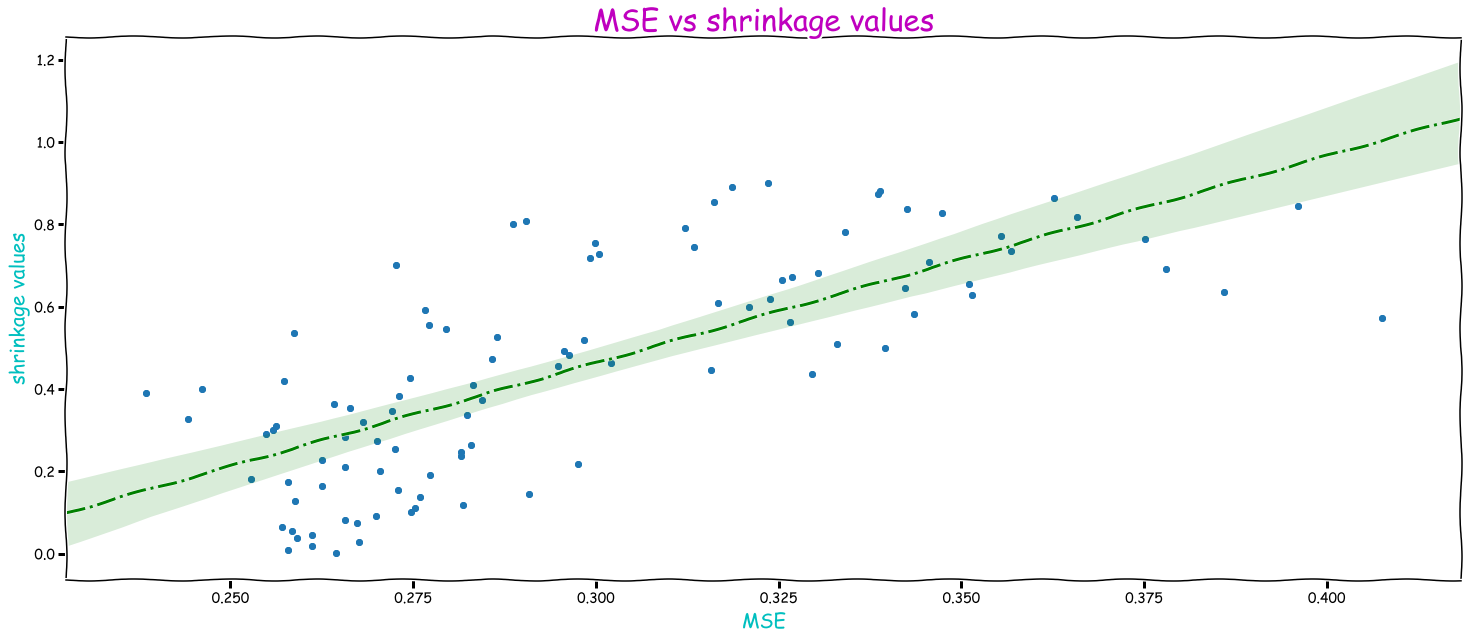

In [101]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(MSE, SP, alpha=1)
sns.regplot(MSE, SP, x_ci='0.95', line_kws={'color': 'g', 'ls': '-.'})
plt.title('MSE vs shrinkage values', fontsize=30, color='m')
plt.xlabel('MSE', fontsize=20, color='c')
plt.ylabel('shrinkage values', fontsize=20, color='c')

### 9.e. Comparing the results of boosting with linear regression

In [102]:
from sklearn.linear_model import LinearRegression

In [105]:
lmreg = LinearRegression().fit(X_train, y_train)
lmpred = lmreg.predict(X_test)
print("MSE from linear regression: ", mean_squared_error(y_test, lmpred))

MSE from linear regression:  0.4472727400525901


In [106]:
print("MSE from boosting: ", MSE.mean())

MSE from boosting:  MSE    0.297373
dtype: float64


**Therefore, boosting provides lower MSE than linear regression.**

### 9.f. Determining importance of each variable

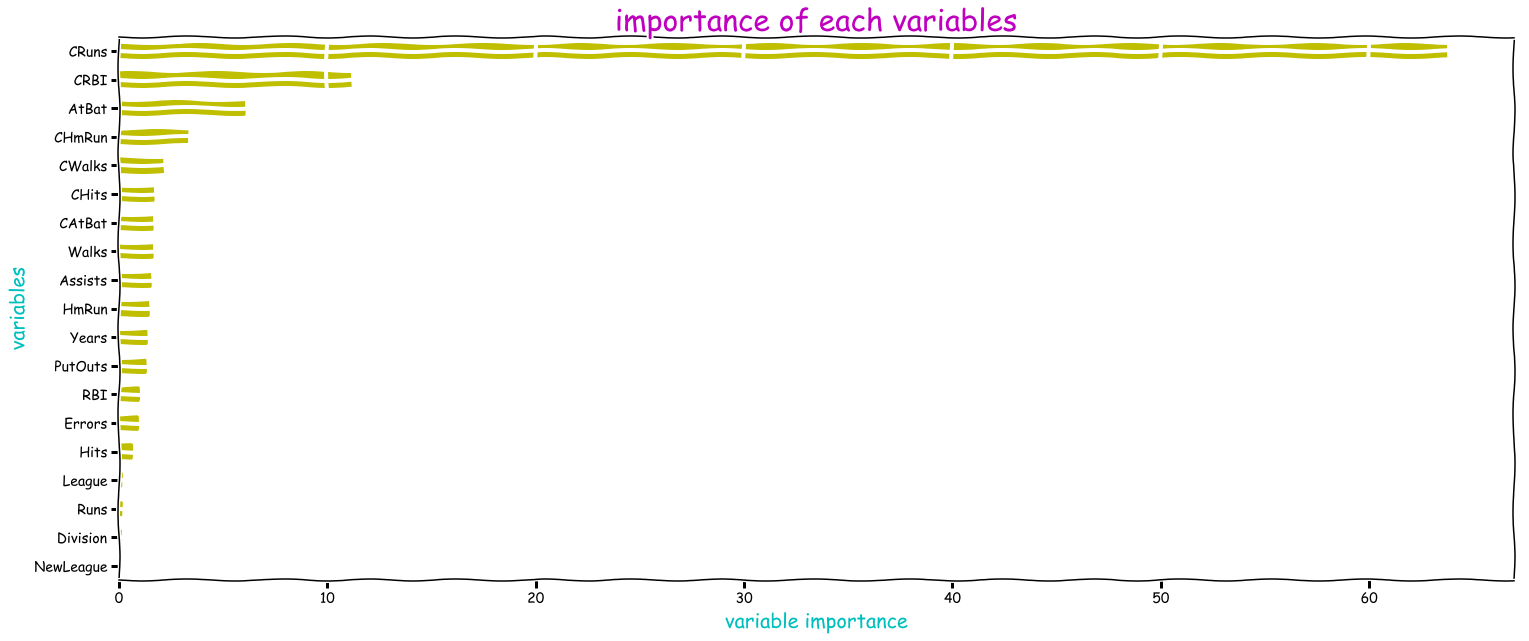

In [107]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', color = 'y', figsize=(25, 10), grid= True, )

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None

**Therefore, 'CRuns', 'CRBI' and 'AtBat' are the most important variables.**

### 9.g. Bagging on the training data set

Mean Squared Error:  0.2529129032807706


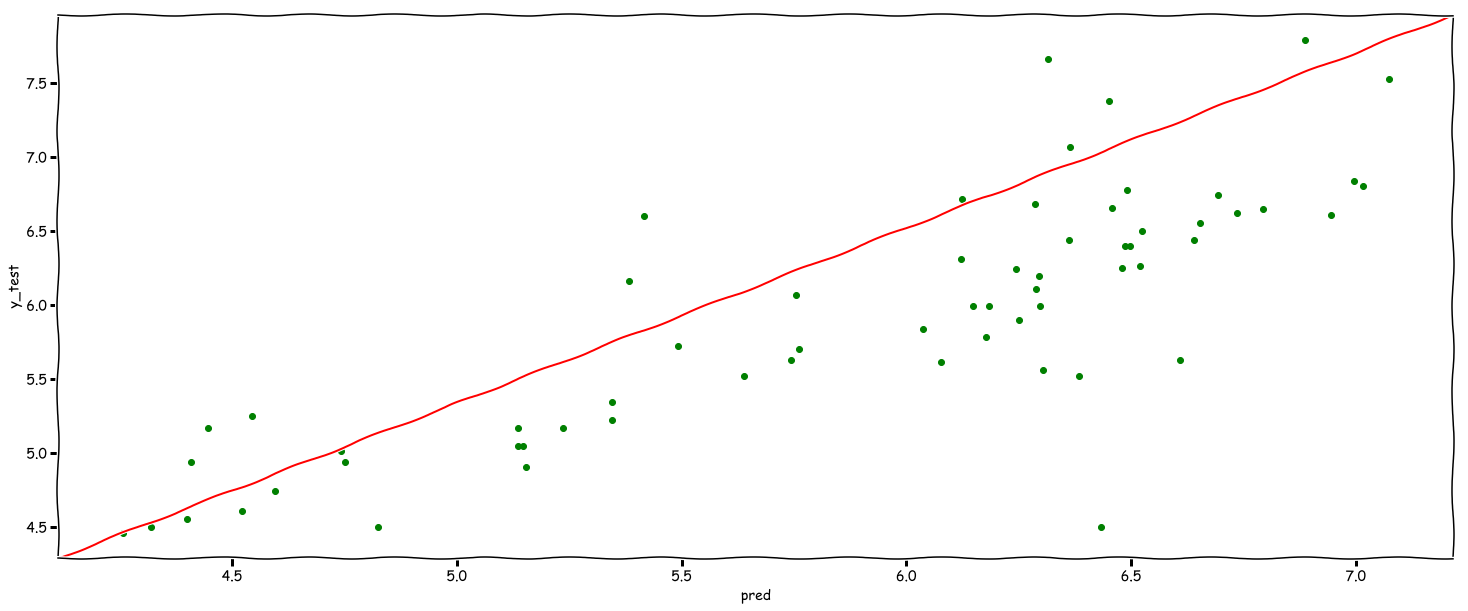

In [112]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

bag = RandomForestRegressor(max_features=19).fit(X_train, y_train)
bag_pred = bag.predict(X_test)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(bag_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

print("Mean Squared Error: ", mean_squared_error(y_test, bag_pred))

**The test MSE for bagging is $\approx$0.25, which is lower than the test MSE for boosting.**